# Crab Age Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd C:\Users\TANMAYA SAHU\Downloads\Data sci project

C:\Users\TANMAYA SAHU\Downloads\Data sci project


In [3]:
crab=pd.read_csv("CrabAgePrediction.csv")
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
crab.shape

(3893, 9)

In [5]:
crab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [6]:
crab.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [7]:
crab.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [8]:
crab.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
Weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
Age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


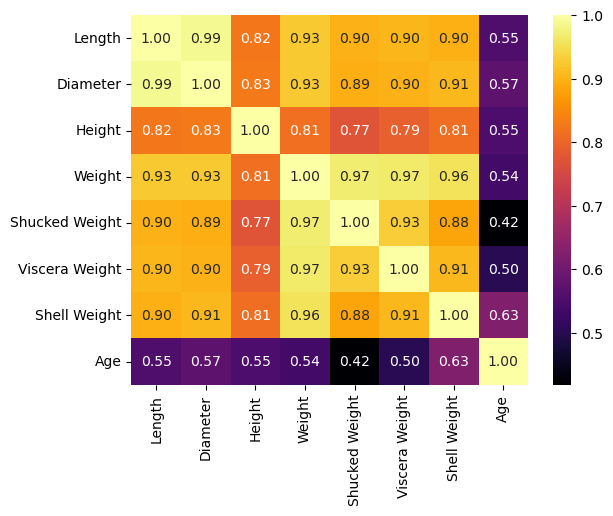

In [9]:
sns.heatmap(crab.corr(),annot=True,fmt='.2f',cmap='inferno')
plt.show()

In [10]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
crab['Sex']=label.fit_transform(crab['Sex'])
print(crab.Sex.unique())

[0 2 1]


In [11]:
crab_X=crab.drop(['Age'],axis=1)
crab_y=crab['Age']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(crab_X,crab_y,test_size=0.25,random_state=30)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
lr=LinearRegression()
lr.fit(X_train,y_train)

polyreg = make_pipeline(PolynomialFeatures(1), LinearRegression())
polyreg.fit(X_train, y_train)

svm=SVR()
svm.fit(X_train,y_train)

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [14]:
ylr_pred=lr.predict(X_test)
ypoly_pred = polyreg.predict(X_test)
ysvm_pred=svm.predict(X_test)
ydt_pred=dt.predict(X_test)
yrfr_pred=rfr.predict(X_test)
pred5=gr.predict(X_test)

In [15]:
lr=r2_score(y_test, ylr_pred)
poly= r2_score(y_test, ypoly_pred)
svm=r2_score(y_test, ysvm_pred)
dt=r2_score(y_test, ydt_pred)
rfr=r2_score(y_test, yrfr_pred)
gr=r2_score(y_test,pred5)

print('r2 score of lr:',lr)
print('\nr2 score of poly',poly)
print('\nr2 score of svm:',svm)
print('\nr2 score of dt',dt)
print('\nr2 score of rfr:',rfr)
print('\nr2 score of gr:',gr)

r2 score of lr: 0.5399736011220463

r2 score of poly 0.5399736011220484

r2 score of svm: 0.510617233733682

r2 score of dt 0.17493415318172734

r2 score of rfr: 0.5532784628042189

r2 score of gr: 0.558665403012494


In [16]:
lr_mae=mean_absolute_error(y_test, ylr_pred)
lr_mse=mean_squared_error(y_test, ylr_pred)
print('MAE of LR :',lr_mae)
print('MSE of LR :',lr_mse)

poly_mae=mean_absolute_error(y_test, ypoly_pred)
poly_mse=mean_squared_error(y_test, ypoly_pred)
print('\nMAE of Poly:',poly_mae)
print('MSE of Poly:',poly_mse)

svm_mae=mean_absolute_error(y_test, ysvm_pred)
svm_mse=mean_squared_error(y_test, ysvm_pred)
print('\nMAE of SVM:',svm_mae)
print('MSE of SVM:',svm_mse)

dt_mae=mean_absolute_error(y_test, ydt_pred)
dt_mse=mean_squared_error(y_test, ydt_pred)
print('\nMAE of DTR:',dt_mae)
print('MSE of DTR:',dt_mse)

rfr_mae=mean_absolute_error(y_test, yrfr_pred)
rfr_mse=mean_squared_error(y_test, yrfr_pred)
print('\nMAE of RFR:',rfr_mae)
print('MSE of RFR:',rfr_mse)

gr_mae=mean_absolute_error(y_test, pred5)
gr_mse=mean_squared_error(y_test, pred5)
print('\nMAE of GBR:',gr_mae)
print('MSE of GBR:',gr_mse)

MAE of LR : 1.5967996708535441
MSE of LR : 4.859501508198337

MAE of Poly: 1.596799670853539
MSE of Poly: 4.859501508198315

MAE of SVM: 1.5527618099050275
MSE of SVM: 5.169608301953945

MAE of DTR: 2.066735112936345
MSE of DTR: 8.715605749486652

MAE of RFR: 1.5259137577002053
MSE of RFR: 4.71895523613963

MAE of GBR: 1.512672195364475
MSE of GBR: 4.6620501451915075


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(crab_X,crab_y,test_size=0.25,random_state=30)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

crab_score=lr.score(X_test,y_test)
crab_score

from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score
ylr_pred=lr.predict(X_test)
crab_mae=mean_absolute_error(y_test, ylr_pred)
crab_mse=mean_squared_error(y_test, ylr_pred)
print('MAE of LR :',crab_mae)
print('MSE of LR :',crab_mse)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform (X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train,y_train)
lin.fit(X_poly_train,y_train)

LinearRegression()

In [20]:
y_Pred=lin.predict(X_test_poly)
y_Pred_train= lin.predict(X_poly_train)

In [21]:
crab_mae=mean_absolute_error(y_test,y_Pred)
print(crab_mae)
crab_mse=mean_squared_error(y_test,y_Pred)
print(crab_mse)

1.5578985334979167
5.286106546165316


In [22]:
crab_score=lin.score(X_poly_train,y_train)

# Holiday Package Destination

In [23]:
holiday=pd.read_csv('Travel.csv')
holiday.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [24]:
holiday.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [25]:
holiday.shape

(4888, 20)

In [26]:
holiday.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [27]:
#removing null values

In [28]:
holiday['Age'].fillna(holiday['Age'].mean(),inplace=True)
holiday['DurationOfPitch'].fillna(holiday['DurationOfPitch'].mean(),inplace=True)
holiday['NumberOfChildrenVisiting'].fillna(method='bfill', inplace=True)
holiday['NumberOfTrips'].fillna(method='bfill', inplace=True)
holiday['NumberOfFollowups'].fillna(method='bfill', inplace=True)
holiday['PreferredPropertyStar'].fillna(method='bfill', inplace=True)

In [29]:
holiday = holiday.dropna().reset_index(drop=True)

In [30]:
holiday['Gender'] = holiday['Gender'].str.replace(' ', '', regex=True)
holiday['Gender'] = holiday['Gender'].str.replace('FeMale', 'Female', regex=True)

In [31]:
holiday['Gender'].value_counts()

Male      2781
Female    1874
Name: Gender, dtype: int64

In [32]:
holiday['ProductPitched'].value_counts()

Basic           1755
Deluxe          1586
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [33]:
holiday['MaritalStatus'].value_counts()

Married      2228
Divorced      902
Single        843
Unmarried     682
Name: MaritalStatus, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
holiday['TypeofContact']=label.fit_transform(holiday['TypeofContact'])
print(holiday['TypeofContact'].unique())

holiday['Occupation']=label.fit_transform(holiday['Occupation'])
print(holiday['Occupation'].unique())

holiday['Gender']=label.fit_transform(holiday['Gender'])
print(holiday['Gender'].unique())

holiday['ProductPitched']=label.fit_transform(holiday['ProductPitched'])
print(holiday['ProductPitched'].unique())

holiday['MaritalStatus']=label.fit_transform(holiday['MaritalStatus'])
print(holiday['MaritalStatus'].unique())

holiday['Designation']=label.fit_transform(holiday['Designation'])
print(holiday['Designation'].unique())

[1 0]
[2 0 3 1]
[0 1]
[1 0 3 4 2]
[2 0 1 3]
[2 1 3 0 4]


In [35]:
holiday[:3]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,200001,0,49.0,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0
2,200002,1,37.0,1,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0


<AxesSubplot:>

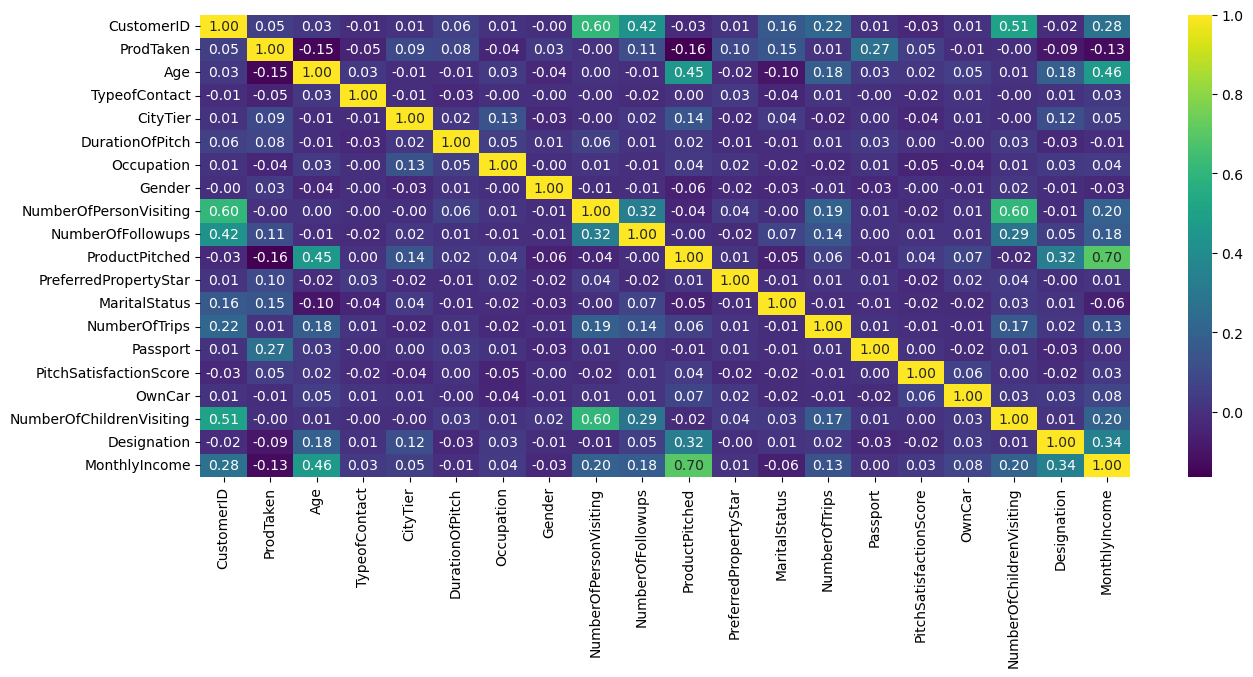

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(holiday.corr(),annot=True,fmt='.2f',cmap='viridis')

In [37]:
holiday_X=holiday.drop(['CustomerID','ProdTaken'],axis=1)
#X[:1]
holiday_y=holiday['ProdTaken']
#y[:3]

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score

In [39]:
X_train,X_test,y_train,y_test=train_test_split(holiday_X,holiday_y,test_size=0.3,random_state=10)

In [40]:
lg__ = LogisticRegression()
lg__.fit(X_train, y_train)

knn__=KNeighborsClassifier()
knn__.fit(X_train,y_train)

svc__=SVC()
svc__.fit(X_train,y_train)

gnb__=GaussianNB()
gnb__.fit(X_train,y_train)

dt__=DecisionTreeClassifier()
dt__.fit(X_train,y_train)

gr__=GradientBoostingClassifier()
gr__.fit(X_train,y_train)

rfr__=RandomForestClassifier()
rfr__.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
print('Logistic Score        :',lg__.score (X_train,y_train))
#print('KNN Score            :',knn__.score(X_train,y_train))
print('SVC Score             :',svc__.score(X_train,y_train))
print('Navie Bayes Score     :',gnb__.score(X_train,y_train))
print('GradientBoosting Score:',gr__.score (X_train,y_train))
print('DecisionTree Score    :',dt__.score (X_train,y_train))
print('RandomForest Score    :',rfr__.score(X_train,y_train))

Logistic Score        : 0.8360957642725598
SVC Score             : 0.809085328422345
Navie Bayes Score     : 0.836402701043585
GradientBoosting Score: 0.8956414978514426
DecisionTree Score    : 1.0
RandomForest Score    : 1.0


In [42]:
lg_ypred =lg__.predict (X_test)
#knn_ypred=knn__.predict(X_test)
svc_ypred=svc__.predict(X_test)
gnb_ypred=gnb__.predict(X_test)
gr_ypred =gr__.predict (X_test)
dt_ypred =dt__.predict (X_test)
rfr_ypred=rfr__.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print('Logistic Accuracy        :',accuracy_score(y_test,lg_ypred))
#print('KNN Accuracy             :',accuracy_score(y_test,knn_ypred))
print('SVC Accuracy             :',accuracy_score(y_test,svc_ypred))
print('Navie Bayes Accuracy     :',accuracy_score(y_test,gnb_ypred))
print('GradientBoosting Accuracy:',accuracy_score(y_test,gr_ypred))
print('DecisionTree Accuracy    :',accuracy_score(y_test,dt_ypred))
print('RandomForest Accuracy    :',accuracy_score(y_test,rfr_ypred))

Logistic Accuracy        : 0.8346456692913385
SVC Accuracy             : 0.8095919828203293
Navie Bayes Accuracy     : 0.8339298496778812
GradientBoosting Accuracy: 0.8675733715103794
DecisionTree Accuracy    : 0.9141016463851109
RandomForest Accuracy    : 0.9212598425196851


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(holiday_X,holiday_y,test_size=0.3,random_state=10)

from sklearn.ensemble import GradientBoostingClassifier
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)

holiday_=gr__.score (X_train,y_train)
holiday_

0.8956414978514426

In [45]:
from sklearn.metrics import accuracy_score, classification_report

gr_ypred =gr__.predict (X_test)
holiday_class_report=classification_report(y_test, lg_ypred)
print(holiday_class_report)

#accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1131
           1       0.72      0.21      0.33       266

    accuracy                           0.83      1397
   macro avg       0.78      0.60      0.62      1397
weighted avg       0.82      0.83      0.80      1397



# Airline Pred

In [46]:
airline=pd.read_csv("airline_pred.csv")
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [47]:
pd.set_option('display.max_columns',30)

In [48]:
airline.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied


In [49]:
airline.shape

(25976, 25)

In [50]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [51]:
airline.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [52]:
airline=airline.dropna()

In [53]:
airline.shape

(25893, 25)

In [54]:
airline.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [55]:
data_copy = airline.copy()

In [56]:
from sklearn import preprocessing 

label=preprocessing.LabelEncoder()
data_copy['Gender']=label.fit_transform(data_copy['Gender'])
data_copy['Customer Type']=label.fit_transform(data_copy['Customer Type'])
data_copy['Type of Travel']=label.fit_transform(data_copy['Type of Travel'])
data_copy['Class']=label.fit_transform(data_copy['Class'])
data_copy['satisfaction']=label.fit_transform(data_copy['satisfaction'])


print(data_copy.Gender.unique())
print(data_copy['Customer Type'].unique())
print(data_copy['Type of Travel'].unique())
print(data_copy.Class.unique())
print(data_copy.satisfaction.unique())

[0 1]
[0 1]
[0 1]
[1 0 2]
[1 0]


In [57]:
airline.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,12987.838566,65021.974858,39.621983,1193.753254,2.723709,3.046422,2.755996,2.976442,3.214923,3.261615,3.448886,3.356969,3.385587,3.349786,3.632681,3.313907,3.648824,3.285521,14.225080,14.740857
std,7499.175165,37606.098635,15.134224,998.626779,1.334711,1.532971,1.412552,1.281661,1.331895,1.355505,1.320254,1.338643,1.282033,1.319045,1.176220,1.269138,1.180650,1.319355,37.185919,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6496.000000,32209.000000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,12984.000000,65344.000000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,19482.000000,97623.000000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


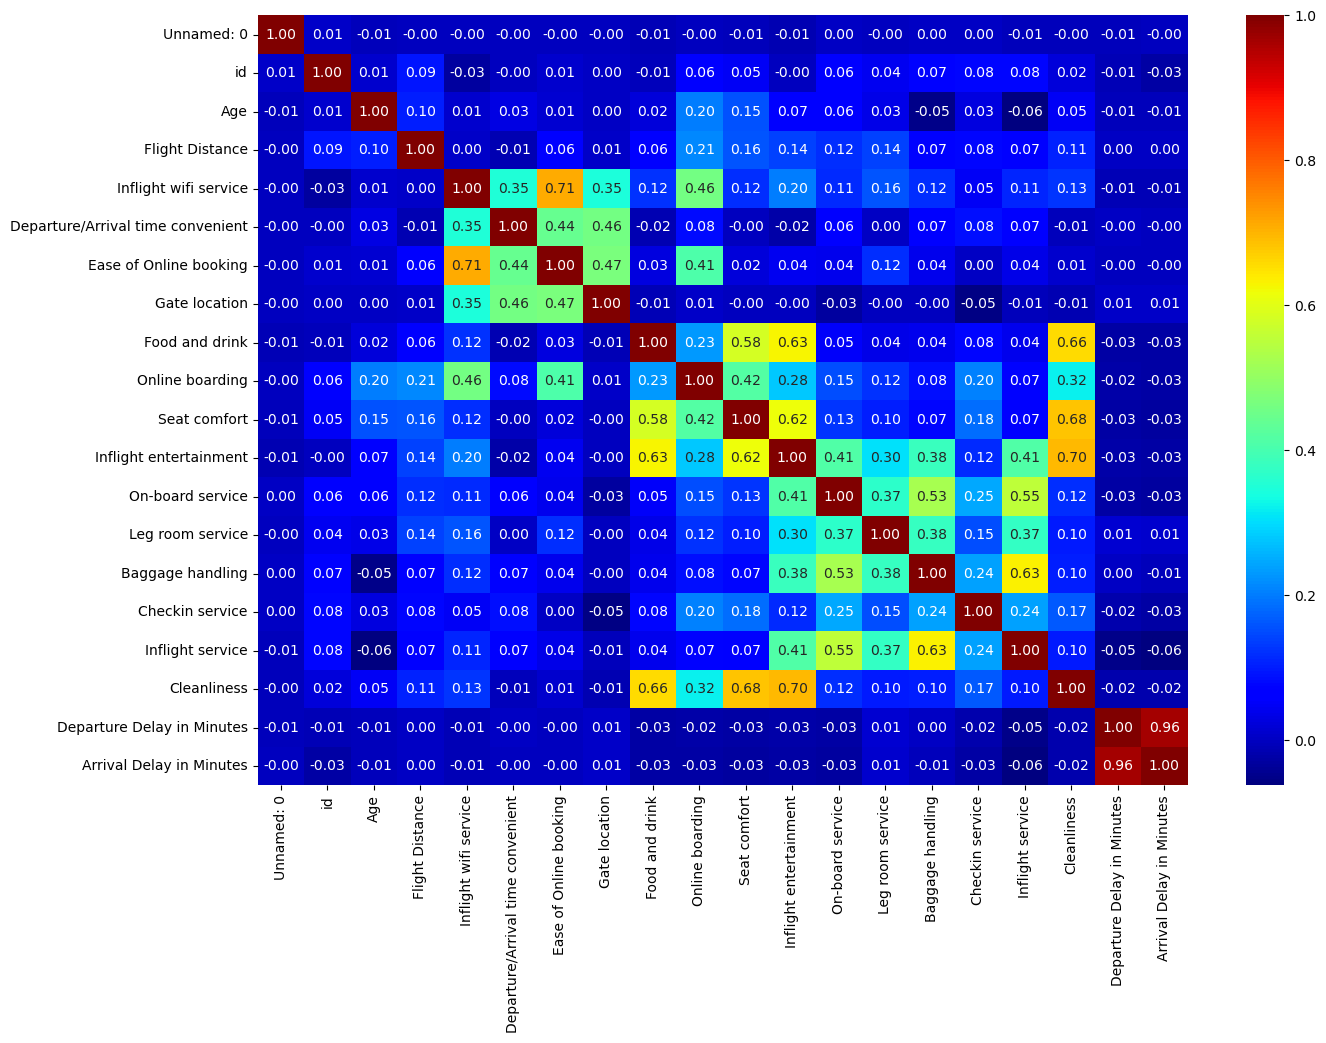

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(airline.corr(),annot=True,fmt='.2f',cmap='jet')
plt.show()

In [59]:
Airline_X=data_copy.drop(['id','Unnamed: 0','satisfaction'],axis=1)
Airline_y=data_copy['satisfaction']

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Airline_X,Airline_y,test_size=0.25,random_state=10)

In [62]:
lin_=LogisticRegression()
lin_.fit(X_train,y_train)

knn_=KNeighborsClassifier()
knn_.fit(X_train,y_train)

svc_=SVC()
svc_.fit(X_train,y_train)

gnb_=GaussianNB()
gnb_.fit(X_train,y_train)

dt_=DecisionTreeClassifier()
dt_.fit(X_train,y_train)

gr_=GradientBoostingClassifier()
gr_.fit(X_train,y_train)

GradientBoostingClassifier()

In [63]:
airline_1=lin_.score(X_train,y_train)
print(airline_1)

#airline_2=knn.score(X_train,y_train)
#print(airline_2)

airline_3=svc_.score(X_train,y_train)
print(airline_3)

airline_4=dt_.score(X_train,y_train)
print(airline_4)

airline_5=gr_.score(X_train,y_train)
print(airline_5)

airline_=gnb_.score(X_train,y_train)
print(airline_)

0.8265616149132293
0.6636799011277614
1.0
0.9447448375302538
0.8589525722230805


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Airline_X,Airline_y,test_size=0.25,random_state=10)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

airline_=gnb.score(X_train,y_train)

In [65]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = gnb.predict(X_test)
airlinepred_classreport=classification_report(y_test, y_pred)
print(airlinepred_classreport)

#accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3650
           1       0.86      0.81      0.83      2824

    accuracy                           0.86      6474
   macro avg       0.86      0.85      0.85      6474
weighted avg       0.86      0.86      0.86      6474



# Elone Musk Tweets

In [66]:
data=pd.read_csv("elon_musk_tweets.csv")
data.head(3)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweets          2668 non-null   object
 1   Retweets        2668 non-null   int64 
 2   Likes           2668 non-null   int64 
 3   Date            2668 non-null   object
 4   Cleaned_Tweets  2668 non-null   object
dtypes: int64(2), object(3)
memory usage: 104.3+ KB


In [68]:
data.isnull().sum()

Tweets            0
Retweets          0
Likes             0
Date              0
Cleaned_Tweets    0
dtype: int64

In [69]:
data.dtypes

Tweets            object
Retweets           int64
Likes              int64
Date              object
Cleaned_Tweets    object
dtype: object

In [70]:
data.columns

Index(['Tweets', 'Retweets', 'Likes', 'Date', 'Cleaned_Tweets'], dtype='object')

In [71]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

tweets = data['Cleaned_Tweets'].tolist()

# Load the sentiment analysis pipeline with a PyTorch model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, framework='pt')

# Get sentiment labels for each tweet
results = sentiment_analyzer(tweets)

# Extract sentiment labels and probabilities
sentiments = [result['label'] for result in results]
probabilities = [result['score'] for result in results]

# Add the sentiment labels and probabilities to the DataFrame
data['Sentiment'] = sentiments
data['Sentiment_Probability'] = probabilities

# Display the updated DataFrame
print(data.head())

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

                                              Tweets  Retweets    Likes  \
0                              @PeterSchiff 🤣 thanks       209     7021   
1                              @ZubyMusic Absolutely       755    26737   
2   Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927   356623   
3     Meeting a lot of cool people at Twitter today!      9366   195546   
4  Entering Twitter HQ – let that sink in! https:...    145520  1043592   

                  Date                                  Cleaned_Tweets  \
0  2022-10-27 16:17:39                                          thanks   
1  2022-10-27 13:19:25                                      Absolutely   
2  2022-10-27 13:08:00                        Dear Twitter Advertisers   
3  2022-10-26 21:39:32  Meeting a lot of cool people at Twitter today!   
4  2022-10-26 18:45:58         Entering Twitter HQ – let that sink in!   

  Sentiment  Sentiment_Probability  
0  POSITIVE               0.999808  
1  POSITIVE               0.99

In [102]:
data['Sentiment'].value_counts()

POSITIVE    1455
NEGATIVE    1213
Name: Sentiment, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame with the mentioned columns
elon_X = data['Cleaned_Tweets']
elon_y = data['Sentiment']

# Split the data into training and testing sets with a specific random state
X_train, X_test, y_train, y_test = train_test_split(elon_X, elon_y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training (using Decision Tree classifier) with a specific random state
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = model.predict(X_test_tfidf)
elon_ = accuracy_score(y_test, y_pred)
print(f"Accuracy: {elon_}")
#print(classification_report(y_test, y_pred))

Accuracy: 0.7134831460674157


In [104]:
from sklearn.metrics import accuracy_score, classification_report
elon_report=classification_report(y_test, y_pred)
print(elon_report)

              precision    recall  f1-score   support

    NEGATIVE       0.70      0.68      0.69       252
    POSITIVE       0.72      0.74      0.73       282

    accuracy                           0.71       534
   macro avg       0.71      0.71      0.71       534
weighted avg       0.71      0.71      0.71       534



# Data Science Salaries in India

In [105]:
salary=pd.read_csv("ds_salaries.csv")
salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [106]:
salary=salary.drop(['Unnamed: 0'],axis=1)

In [107]:
salary.shape

(607, 11)

In [108]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [109]:
pd.options.display.float_format = '{:.2f}'.format

In [110]:
salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00
mean,2021.41,324000.06,112297.87,70.92
std,0.69,1544357.49,70957.26,40.71
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,70000.00,62726.00,50.00
50%,2022.00,115000.00,101570.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


In [111]:
salary.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.00,-0.09,0.17,0.08
salary,-0.09,1.00,-0.08,-0.01
salary_in_usd,0.17,-0.08,1.00,0.13
remote_ratio,0.08,-0.01,0.13,1.00


<AxesSubplot:>

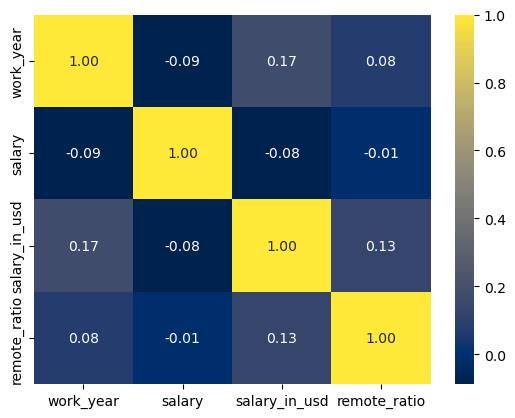

In [112]:
sns.heatmap(salary.corr(),annot=True,fmt='.2f',cmap='cividis')

In [113]:
salary['job_title'].nunique()

50

In [114]:
salary['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [115]:
salary['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [116]:
salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [117]:
data_copy = salary.copy(deep=True)

In [118]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

data_copy['work_year']=label.fit_transform(data_copy['work_year'])
print('Unique value of work_year:',data_copy['work_year'].unique())

data_copy['experience_level']=label.fit_transform(data_copy['experience_level'])
print('\nUnique value of experience_level:',data_copy['experience_level'].unique())

data_copy['employment_type']=label.fit_transform(data_copy['employment_type'])
print('\nUnique value of employment_type:',data_copy['employment_type'].unique())

data_copy['company_size']=label.fit_transform(data_copy['company_size'])
print('\nUnique value of company_size:',data_copy['company_size'].unique())

data_copy['job_title']=label.fit_transform(data_copy['job_title'])
print('\nUnique value of job_title:',data_copy['job_title'].unique())

data_copy['employee_residence']=label.fit_transform(data_copy['employee_residence'])
print('\nUnique value of employee_residence:',data_copy['employee_residence'].unique())

data_copy['company_location']=label.fit_transform(data_copy['company_location'])
print('\nUnique value of company_location:',data_copy['company_location'].unique())

data_copy['salary_currency']=label.fit_transform(data_copy['salary_currency'])
print('\nUnique value of salary_currency:',data_copy['salary_currency'].unique())

Unique value of work_year: [0 1 2]

Unique value of experience_level: [2 3 0 1]

Unique value of employment_type: [2 0 3 1]

Unique value of company_size: [0 2 1]

Unique value of job_title: [22 41  7 47 38 12 34  8 33 32 17 19  5 25 48 40 18 39 36  1 10 46 21 29
  0 13  3 42  9 28 11 24 20 45 37  4 15 30 23 16 27 44  6 49  2 26 31 43
 35 14]

Unique value of employee_residence: [14 32 20 23 55 25 41 19 27 43 44 46 11 21  0 40 37  8  2 39 42 18 15 49
 30 24  5 50  7 28 56  4 54 36 10 47 29 12 35 33 51 22 53 48 45 34 31 13
  1 16 52 38 17  3  6 26  9]

Unique value of company_location: [12 29 18 20 48 22 38 17 25 39  9 19  0 37 34  6  2 36 16 41 13 28 21 31
 40 44 42 26  5  4 47 24 43 33  8 27 10 32 30 45  7 49  1 46 11 14 15 35
  3 23]

Unique value of salary_currency: [ 7 16  8  9 10 11  5 12  2  6 13 14  4  1 15  0  3]


<AxesSubplot:>

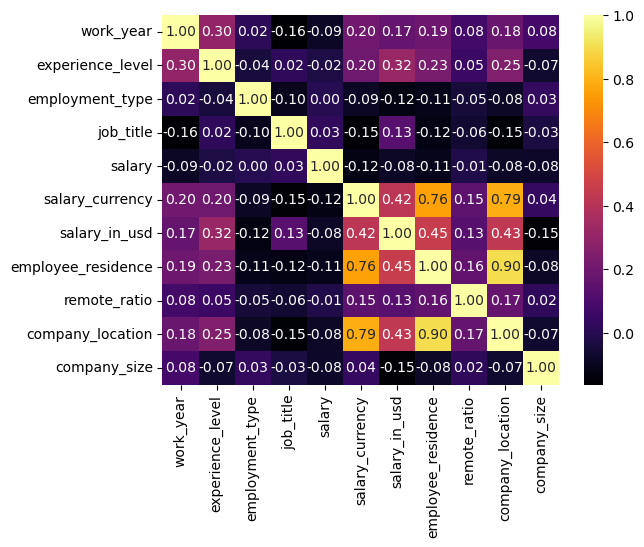

In [119]:
sns.heatmap(data_copy.corr(),annot=True,fmt='.2f',cmap='inferno')

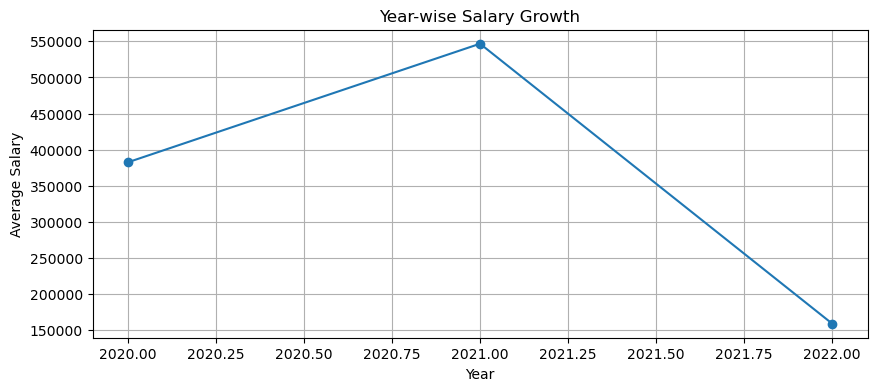

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
salary['work_year'] = pd.to_datetime(salary['work_year'], format='%Y')

# Group the data by 'work_year' and calculate the average salary for each year
yearly_salary = salary.groupby(salary['work_year'].dt.year)['salary'].mean()

plt.plot(yearly_salary.index, yearly_salary.values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Year-wise Salary Growth')

plt.grid(True) 
plt.show()

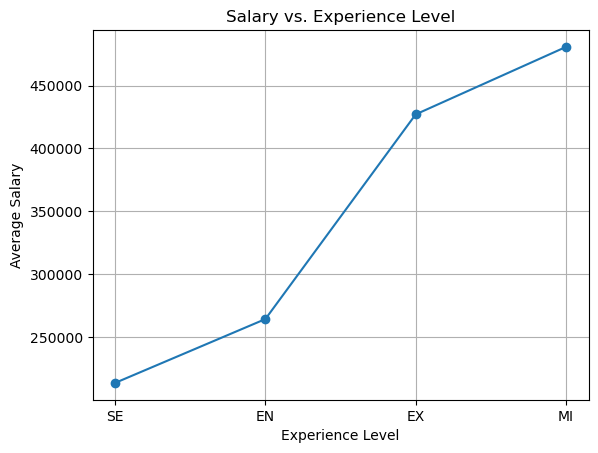

In [121]:
import matplotlib.pyplot as plt

# Group the data by 'experience_level' and calculate the average salary for each level
experience_salary = salary.groupby('experience_level')['salary'].mean().sort_values(ascending=True)

# Create a line plot
plt.plot(experience_salary.index, experience_salary.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Salary vs. Experience Level')

plt.grid(True)  
plt.show()

In [122]:
salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [123]:
salary_X=data_copy.drop(['salary_in_usd','salary','job_title','salary_currency','employee_residence','company_location'],axis=1)
salary_y=data_copy['salary_in_usd']

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(salary_X,salary_y,test_size=0.3,random_state=10)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [126]:
_lr=LinearRegression()
_lr.fit(X_train,y_train)

_polyreg = make_pipeline(PolynomialFeatures(1), LinearRegression())
_polyreg.fit(X_train, y_train)

_svr=SVR()
_svr.fit(X_train,y_train)

_dtr=DecisionTreeRegressor()
_dtr.fit(X_train,y_train)

_rfr=RandomForestRegressor()
_rfr.fit(X_train,y_train)

_gbr=GradientBoostingRegressor()
_gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [127]:
print('Linear Regression score :')
print(_lr.score(X_train,y_train))
print(_lr.score(X_test,y_test))

print('\nPolynomial Regression Score :')
print(_polyreg.score(X_train,y_train))
print(_polyreg.score(X_test,y_test))

print('\nSVM score :')
print(_svr.score(X_train,y_train))
print(_svr.score(X_test,y_test))

print('\nDecisionTree score :')
print(_dtr.score(X_train,y_train))
print(_dtr.score(X_test,y_test))

print('\nRandomForest score :')
print(_rfr.score(X_train,y_train))
print(_rfr.score(X_test,y_test))

print('\nGradientBoosting score :')
print(_gbr.score(X_train,y_train))
print(_gbr.score(X_test,y_test))

Linear Regression score :
0.19647724527660548
0.07924794702669069

Polynomial Regression Score :
0.1964772452766056
0.07924794702669069

SVM score :
-0.011110781877459619
-0.011149924437035663

DecisionTree score :
0.5320992252498639
0.14483895703047522

RandomForest score :
0.5076478122657438
0.16352993219526724

GradientBoosting score :
0.4749518224931293
0.17431732630663122


In [128]:
_lr_pred=_lr.predict(X_test)
_poly_pred=_polyreg.predict(X_test)
_svm_pred=_svr.predict(X_test)
_dtr_pred=_dtr.predict(X_test)
_rfr_pred=_rfr.predict(X_test)
_gbr_pred=_gbr.predict(X_test)

In [129]:
lr_r2score=r2_score(y_test,_lr_pred)
print('R2 Score of Linear Regression:',lr_r2score)

poly_r2score=r2_score(y_test,_poly_pred)
print('R2 Score of Polynomial Regression:',poly_r2score)

svm_r2score=r2_score(y_test,_svm_pred)
print('R2 Score of Support vector regressor:',svm_r2score)

dtr_r2score=r2_score(y_test,_dtr_pred)
print('R2 Score of DecisionTree Regressor:',dtr_r2score)

rfr_r2score=r2_score(y_test,_rfr_pred)
print('R2 Score of RandomForest Regressor:',rfr_r2score)

gbr_r2score=r2_score(y_test,_gbr_pred)
print('R2 Score of GrandientBoosting Regressor:',gbr_r2score)

R2 Score of Linear Regression: 0.07924794702669069
R2 Score of Polynomial Regression: 0.07924794702669069
R2 Score of Support vector regressor: -0.011149924437035663
R2 Score of DecisionTree Regressor: 0.14483895703047522
R2 Score of RandomForest Regressor: 0.16352993219526724
R2 Score of GrandientBoosting Regressor: 0.17431732630663122


In [130]:
from sklearn.tree import DecisionTreeRegressor
_dtr=DecisionTreeRegressor()
_dtr.fit(X_train,y_train)
salary_=_dtr.score(X_test,y_test)
salary_

0.1484281944670186

In [132]:
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score
_lr_pred=_dtr.predict(X_test)
ds_salary_mae=mean_absolute_error(y_test, _lr_pred)
ds_salary_mse=mean_squared_error(y_test, _lr_pred)
print('MAE of DTR :',ds_salary_mae)
print('MSE of DTR :',ds_salary_mse)

MAE of DTR : 51742.22925142844
MSE of DTR : 6111900763.787848


# Who is the boss

In [133]:
import pandas as pd
boss=pd.read_csv("personal.csv")
boss.head(2)

,id,date,type,sender,receiver
0,1,2006-02-21T10:00:31.000Z,to,pariatur.officiis.officiis.et@nihil.bogisich.info,aut.dolorem.incidunt.eum@iure.kuvalis.info
1,2,2006-02-21T10:00:31.000Z,to,pariatur.officiis.officiis.et@nihil.bogisich.info,aut.dolorem.incidunt.eum@iure.kuvalis.info


In [134]:
boss.shape

(82270, 5)

In [135]:
boss.columns

Index(['id', 'date', 'type', 'sender', 'receiver'], dtype='object')

In [136]:
boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82270 entries, 0 to 82269
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        82270 non-null  int64 
 1   date      82270 non-null  object
 2   type      82270 non-null  object
 3   sender    82270 non-null  object
 4   receiver  82270 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [137]:
# Extract domains and users
boss['sender_domain'] = boss['sender'].apply(lambda x: x.split('@')[1])
boss['receiver_domain'] = boss['receiver'].apply(lambda x: x.split('@')[1])

boss['sender_user'] = boss['sender'].apply(lambda x: x.split('@')[0])
boss['receiver_user'] = boss['receiver'].apply(lambda x: x.split('@')[0])

# Analyze communication patterns
sender_counts = boss['sender_user'].value_counts()
receiver_counts = boss['receiver_user'].value_counts()

# Display results
print("Sender Domains:")
print(boss['sender_domain'].unique())
print("\nReceiver Domains:")
print(boss['receiver_domain'].unique())


print("\nSender Users and Counts:")
print(sender_counts)
print("\nReceiver Users and Counts:")
print(receiver_counts)

Sender Domains:
['nihil.bogisich.info' 'iure.kuvalis.info' 'distinctio.nikolaus.tv' ...
 'et.brook.co.uk' 'sequi.renner.net' 'harum.wisoky.info']

Receiver Domains:
['iure.kuvalis.info' 'enim.oberbrunner.com' 'distinctio.nikolaus.tv' ...
 'sunt.weissnat.com' 'sequi.renner.net' 'harum.wisoky.info']

Sender Users and Counts:
pariatur.autem.error.tenetur          29671
est.voluptas.beatae.exercitationem     5810
et.quibusdam.sed.vel                   1218
cum.similique.ipsa.esse                1067
atque.delectus.laboriosam.tempora       980
                                      ...  
ut.sunt.quis.quos                         1
nostrum.ea.voluptates.dignissimos         1
soluta.cupiditate.sed.quas                1
voluptatem.molestiae.et.itaque            1
aut.vel.corrupti.velit                    1
Name: sender_user, Length: 3545, dtype: int64

Receiver Users and Counts:
aut.dolorem.incidunt.eum                   18053
cum.similique.ipsa.esse                    12094
ut.perspiciatis.vol

In [138]:
potential_bosses = sender_counts[sender_counts > receiver_counts.max()]
potential_bosses

pariatur.autem.error.tenetur    29671
Name: sender_user, dtype: int64

In [139]:
# Identify common domains
common_domains = set(boss['sender_domain']).intersection(set(boss['receiver_domain']))

# Analyze communication patterns for potential hierarchy
potential_bosses = sender_counts[sender_counts > receiver_counts.max()]

# Display results
print("\nCommon Domains:")
print(common_domains)
print("\nPotential Bosses (Based on Communication Patterns):")
print(potential_bosses)


Common Domains:
{'perspiciatis.ivy.name', 'harum.chloe.biz', 'nisi.silas.biz', 'et.veum.biz', 'delectus.alexis.tv', 'velit.waters.ca', 'veritatis.schoen.us', 'repudiandae.edna.biz', 'a.kaia.co.uk', 'sit.schumm.name', 'sint.harvey.me', 'ut.cummerata.org', 'enim.prohaska.ca', 'minima.wunsch.name', 'dolorem.cronin.ca', 'nostrum.vandervort.name', 'omnis.wunsch.net', 'suscipit.berry.me', 'cupiditate.janelle.tv', 'qui.gusikowski.tv', 'voluptatem.kamren.ca', 'alias.frami.net', 'sit.haylee.biz', 'laboriosam.electa.com', 'inventore.cronin.io', 'unde.jesse.info', 'iste.rau.io', 'aut.jast.com', 'totam.adolphus.name', 'ad.hermiston.io', 'quos.mcclure.net', 'unde.jimmy.tv', 'quas.gerald.biz', 'et.hahn.ca', 'dolore.johnson.ca', 'sint.dicki.us', 'sunt.gulgowski.com', 'repudiandae.gaetano.io', 'reprehenderit.shaniya.org', 'fugit.borer.co.uk', 'numquam.lebsack.io', 'doloremque.pansy.biz', 'ut.hilll.net', 'laboriosam.freeman.us', 'enim.oberbrunner.com', 'distinctio.braun.info', 'voluptas.abbott.ca', 'u

In [140]:
boss['is_boss'] = 0

In [141]:
boss_usernames = potential_bosses.index.tolist()
boss.loc[boss['sender_user'].isin(boss_usernames), 'is_boss'] = 1

In [142]:
print(boss[['sender_user', 'is_boss']])

                         sender_user  is_boss
0      pariatur.officiis.officiis.et        0
1      pariatur.officiis.officiis.et        0
2              nam.expedita.aut.eius        0
3           aut.dolorem.incidunt.eum        0
4              nam.expedita.aut.eius        0
...                              ...      ...
82265        cum.similique.ipsa.esse        0
82266        cum.similique.ipsa.esse        0
82267     ad.minima.rerum.laudantium        0
82268     eaque.consequatur.quis.est        0
82269       deserunt.a.suscipit.vero        0

[82270 rows x 2 columns]


In [143]:
boss.is_boss.value_counts()

0    52599
1    29671
Name: is_boss, dtype: int64

In [144]:
boss.columns

Index(['id', 'date', 'type', 'sender', 'receiver', 'sender_domain',
       'receiver_domain', 'sender_user', 'receiver_user', 'is_boss'],
      dtype='object')

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is your DataFrame
boss_X = boss[['sender_domain', 'receiver_domain', 'sender_user', 'receiver_user']]
boss_y = boss['is_boss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boss_X, boss_y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test_tfidf = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Model training
model = LogisticRegression(C=10)
model.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = model.predict(X_test_tfidf)
boss_ = accuracy_score(y_test, y_pred)
print(f"Accuracy: {boss_}")
#print(classification_report(y_test, y_pred))

Accuracy: 0.9967181232527045


In [146]:
from sklearn.metrics import accuracy_score, classification_report
boss_report=classification_report(y_test, y_pred)
print(boss_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10428
           1       0.99      1.00      1.00      6026

    accuracy                           1.00     16454
   macro avg       1.00      1.00      1.00     16454
weighted avg       1.00      1.00      1.00     16454



Connect All Dataset

In [148]:
print("******* Welcome to Project of Machine Learning *******")

def call_selected_name(choice):
    if choice == 1:
        selected_names = ["crab_X","crab_y","crab_mae", "crab_mse","crab_score" ]
    elif choice == 2:
        selected_names = ["holiday_X","holiday_y","holiday_","holiday_class_report",]
    elif choice == 3:
        selected_names = ["Airline_X","Airline_y","airline_","airlinepred_classreport",]
    elif choice == 4:
        selected_names = ["elon_X","elon_y","elon_", "elon_report",]
    elif choice == 5:
        selected_names = ["salary_X","salary_y","ds_salary_mae", "ds_salary_mse","salary_"]
    elif choice == 6:
        selected_names = ["boss_X","boss_y","boss_", "boss_report"]
    elif choice == 0:
        print("Exiting the program.")
        exit()
    else:
        print("Invalid choice ❌. Please enter 1, 2, 3, 4, 5, 6 or 0 to exit.")
        return

    print("\nAccuracy of Models:")
    for selected_name in selected_names:
        try:
            value = globals()[selected_name]
            print(f"Your {selected_name} value: {value}")
        except NameError:
            print(f"Error: {selected_name} not defined")

while True:
    print('\n1-crabAgePred')
    print('2-HolidayPackage')
    print('3-AirlinePred')
    print('4-ElonMusk')
    print('5-DataScienceSalary')
    print('6-Who is the boss')
    print('0-exit')
    
    user_input = input("\nEnter your choice (0 to 6): ")

    if user_input.startswith('0') and len(user_input) > 1:
        print("Invalid input. Please enter a valid integer.")
        continue

    try:
        user_choice = int(user_input)
    except ValueError:
        print("Invalid input. Please enter a valid integer.")
        continue  

    if user_choice == 0:
        break
    call_selected_name(user_choice)

******* Welcome to Project of Machine Learning *******

1-crabAgePred
2-HolidayPackage
3-AirlinePred
4-ElonMusk
5-DataScienceSalary
6-Who is the boss
0-exit

Enter your choice (0 to 6): 1

Accuracy of Models:
Your crab_X value:       Sex  Length  Diameter  Height  Weight  Shucked Weight  Viscera Weight  \
0       0    1.44      1.18    0.41   24.64           12.33            5.58   
1       2    0.89      0.65    0.21    5.40            2.30            1.37   
2       1    1.04      0.78    0.25    7.95            3.23            1.60   
3       0    1.18      0.89    0.25   13.48            4.75            2.28   
4       1    0.89      0.66    0.21    6.90            3.46            1.49   
...   ...     ...       ...     ...     ...             ...             ...   
3888    0    1.46      1.14    0.33   24.82           11.65            5.85   
3889    0    1.55      1.21    0.44   34.46           15.45            7.17   
3890    1    0.62      0.46    0.16    2.01            0.77  